In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

input_size = (64,64)
def build_classifier():
    classifier = Sequential() 
    classifier.add(Conv2D(128,(3,3), input_shape=(*input_size,3), activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(128,(3,3), activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(128, (3,3), activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(128, (3,3), activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'sigmoid', units = 1))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (input_size),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (input_size),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier = build_classifier()
batch_size = 32
classifier_history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/batch_size,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 2000/batch_size)

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
250/250 [==============================] - 917s 4s/step - loss: 0.7205 - acc: 0.5776 - val_loss: 0.7252 - val_acc: 0.5505
Epoch 2/50
250/250 [==============================] - 876s 4s/step - loss: 0.6372 - acc: 0.6456 - val_loss: 0.6836 - val_acc: 0.6110
Epoch 3/50
250/250 [==============================] - 878s 4s/step - loss: 0.5915 - acc: 0.6865 - val_loss: 1.3000 - val_acc: 0.5560
Epoch 4/50
250/250 [==============================] - 879s 4s/step - loss: 0.5523 - acc: 0.7114 - val_loss: 0.8244 - val_acc: 0.6115
Epoch 5/50
250/250 [==============================] - 884s 4s/step - loss: 0.5209 - acc: 0.7397 - val_loss: 0.5449 - val_acc: 0.7235
Epoch 6/50
250/250 [==============================] - 869s 3s/step - loss: 0.4861 - acc: 0.7660 - val_loss: 0.6625 - val_acc: 0.629

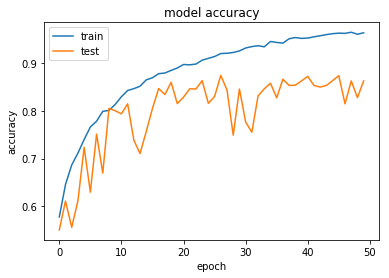

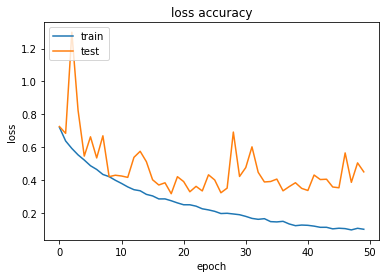

The model class indices are: {'cats': 0, 'dogs': 1}


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

In [3]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'dog'

In [4]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'

In [5]:
classifier_history.history['acc']

[0.577625,
 0.645625,
 0.6865,
 0.711375,
 0.73975,
 0.766,
 0.778125,
 0.79875,
 0.80075,
 0.81325,
 0.829375,
 0.842375,
 0.84625,
 0.851375,
 0.864625,
 0.869125,
 0.877625,
 0.879,
 0.8845,
 0.8895,
 0.896875,
 0.896125,
 0.89775,
 0.905875,
 0.90975,
 0.9135,
 0.91975,
 0.920375,
 0.922,
 0.92525,
 0.931375,
 0.934375,
 0.936125,
 0.933875,
 0.945,
 0.943,
 0.941625,
 0.95075,
 0.95325,
 0.9515,
 0.95225,
 0.95475,
 0.957,
 0.959375,
 0.961375,
 0.9625,
 0.962,
 0.964375,
 0.96025,
 0.96325]

In [6]:
classifier_history.history['val_acc']

[0.5505,
 0.611,
 0.556,
 0.6115,
 0.7235,
 0.6295,
 0.751,
 0.6695,
 0.805,
 0.8,
 0.7935,
 0.8145,
 0.7385,
 0.7105,
 0.7565,
 0.805,
 0.8465,
 0.834,
 0.8595,
 0.815,
 0.8285,
 0.846,
 0.8455,
 0.863,
 0.8155,
 0.83,
 0.874,
 0.8435,
 0.749,
 0.8455,
 0.7765,
 0.755,
 0.831,
 0.846,
 0.8575,
 0.827,
 0.866,
 0.853,
 0.8535,
 0.8625,
 0.872,
 0.853,
 0.8495,
 0.853,
 0.863,
 0.8735,
 0.8145,
 0.8625,
 0.8275,
 0.8625]